In [1]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
import graspologic as gl
from celegans_connectome_analysis.get_nx import get_adult_c_elegans_nx,get_fxnl_nx

In [34]:
G_fx = get_fxnl_nx()
G_stx = get_adult_c_elegans_nx()

/home/gwyneth-local/celegans_connectome_analysis/celegans_connectome_analysis/get_nx.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["neuron type"] = df["neuron type"].fillna(method='ffill')


In [3]:
# goal: make a di_graph that contants functional and structural information
fx_nodes = set(G_fx.nodes())
stx_nodes = set(G_stx.nodes())

print(stx_nodes - fx_nodes)
print(fx_nodes - stx_nodes)

{'GLRR', 'BWM-DL02', 'ADFR', 'SDQR', 'BWM-DL08', 'GLRL', 'BWM-DR06', 'PVCL', 'BWM-DL04', 'BWM-DL05', 'BWM-DR04', 'DVA', 'BWM-DR02', 'BWM-VL05', 'BDUR', 'AIAR', 'BWM-VL01', 'GLRVL', 'CEPshVR', 'GLRVR', 'PVR', 'PVQL', 'PVNR', 'AVM', 'ALNR', 'BWM-VR06', 'PVQR', 'BWM-DL07', 'CEPshDL', 'BWM-DR03', 'BWM-DR07', 'BWM-VR04', 'PLNR', 'IL2VR', 'BWM-VL08', 'BWM-VR05', 'BWM-DL06', 'ALMR', 'SIBDR', 'CANR', 'DVC', 'RMHL', 'BWM-VL06', 'ALML', 'BWM-DL01', 'CEPshVL', 'HSNR', 'BWM-VL07', 'BWM-DR08', 'PVPL', 'CEPshDR', 'GLRDR', 'BWM-VR07', 'HSNL', 'BWM-VL03', 'BWM-VL02', 'BWM-VL04', 'ALNL', 'PVNL', 'BWM-VR02', 'BWM-VR08', 'BWM-DR05', 'AIAL', 'SIADL', 'CANL', 'RIPR', 'SIAVL', 'GLRDL', 'BWM-DL03', 'BWM-DR01', 'PVPR', 'BDUL', 'SIAVR', 'AVFR', 'PVCR', 'BWM-VR03', 'SIADR', 'PVT', 'SIBDL', 'RMHR', 'IL1L', 'PLNL', 'RIFL', 'BWM-VR01', 'SIBVL', 'SDQL'}
{'AS1', 'M3R', 'MCL', 'M5', 'M3L', 'MCR', 'I4', 'IL2V4', 'I1R', 'MI', 'SABD', 'SABVR', 'DB2', 'AVG', 'I6', 'M2L', 'VB2', 'SABVL', 'VA1', 'I3', 'VB1', 'DD1', 'I2R', 

In [4]:
def combined_graph(stx, fx):
    G = nx.DiGraph()
    transfer_info(G, fx, 'fx_weight')
    transfer_info(G, stx, 'stx_weight')
    return G

def transfer_info(G: nx.DiGraph, source: nx.DiGraph, weight_label: str):
    for node in source.nodes():
        if node not in G.nodes():
            G.add_node(node)
        else:
            if 'neuron type' not in G.nodes[node]:
                print("Have not set neuron type for node")
            else:
                print(f"Node matches neuron_type already in G: {(G.nodes[node]['neuron type'] == source.nodes[node]['neuron type'])}")
        
        G.nodes[node]['neuron type'] = source.nodes[node]['neuron type']
        # add out edge information
        for target, infos in source[node].items():
            if not G.has_edge(node, target):
                G.add_edge(node, target)
            renamed_infos = {weight_label: infos['weight']}
            G[node][target].update(renamed_infos)

In [34]:
G = combined_graph(G_stx, G_fx)
print(G)

Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set neuron type for node
Have not set n

In [5]:
# mini tests

# test 1: check if all fx nodes are in G
def check_fx(G: nx.DiGraph, fx_nodes: set):
    for node in fx_nodes:
        assert node in G.nodes(), f"Node {node} not in G"

# test 2: check if all stx nodes are in G
def check_stx(G: nx.DiGraph, stx_nodes: set):
    for node in stx_nodes:
        assert node in G.nodes(), f"Node {node} not in G"

# test 3: check if all fx edges are in G and weights match
def check_fx_edges(G: nx.DiGraph, fx: nx.DiGraph):
    for node in fx.nodes():
        for target, infos in fx[node].items():
            assert G[node][target]['fx_weight'] == infos['weight'], f"Weight mismatch between G and fx"

# test 4: check if all stx edges are in G and weights match
def check_stx_edges(G: nx.DiGraph, stx: nx.DiGraph):
    for node in stx.nodes():
        for target, infos in stx[node].items():
            assert G[node][target]['stx_weight'] == infos['weight'], f"Weight mismatch between G and stx"

# test 5: check if all nodes have stx neuron type attribute
def check_neuron_type(G: nx.DiGraph, stx: nx.DiGraph):
    for node in stx.nodes():
        assert G.nodes[node]['neuron type'] == stx.nodes[node]['neuron type'], f"Neuron type mismatch between G and stx"

In [36]:
# run tests
check_fx(G, fx_nodes)
check_stx(G, stx_nodes)
check_fx_edges(G, G_fx)
check_stx_edges(G, G_stx)
check_neuron_type(G, G_stx)

In [37]:
# save graph
nx.write_gpickle(G, 'combined_graph.gpickle')

In [6]:
# load and test
G_loaded = nx.read_gpickle('data/combined_graph.gpickle')
check_fx(G_loaded, fx_nodes)
check_stx(G_loaded, stx_nodes)
check_fx_edges(G_loaded, G_fx)
check_stx_edges(G_loaded, G_stx)
check_neuron_type(G_loaded, G_stx)

In [22]:
muscle_nodes = [n for n in G_loaded.nodes if G_loaded.nodes[n]["neuron type"] == "Muscle"]

# Remove muscle nodes from G_loaded
G_loaded.remove_nodes_from(muscle_nodes)

In [48]:
category_order = {'Sens.': 0, 'Inter.': 1, 'Mot.': 2, 'Mod.': 3, 'Other': 4}

ordered_nodes = sorted(G_loaded.nodes(), key=lambda n: (category_order[G_loaded.nodes[n]["neuron type"]], -1 * (n in G_fx.nodes() and n in G_stx.nodes())))

stx_adj_matrix = nx.adjacency_matrix(G_loaded, nodelist=ordered_nodes, weight='stx_weight').todense()
fx_adj_matrix = nx.adjacency_matrix(G_loaded, nodelist=ordered_nodes, weight='fx_weight').todense()

neuron_types = [G_loaded.nodes[n]["neuron type"] for n in ordered_nodes]

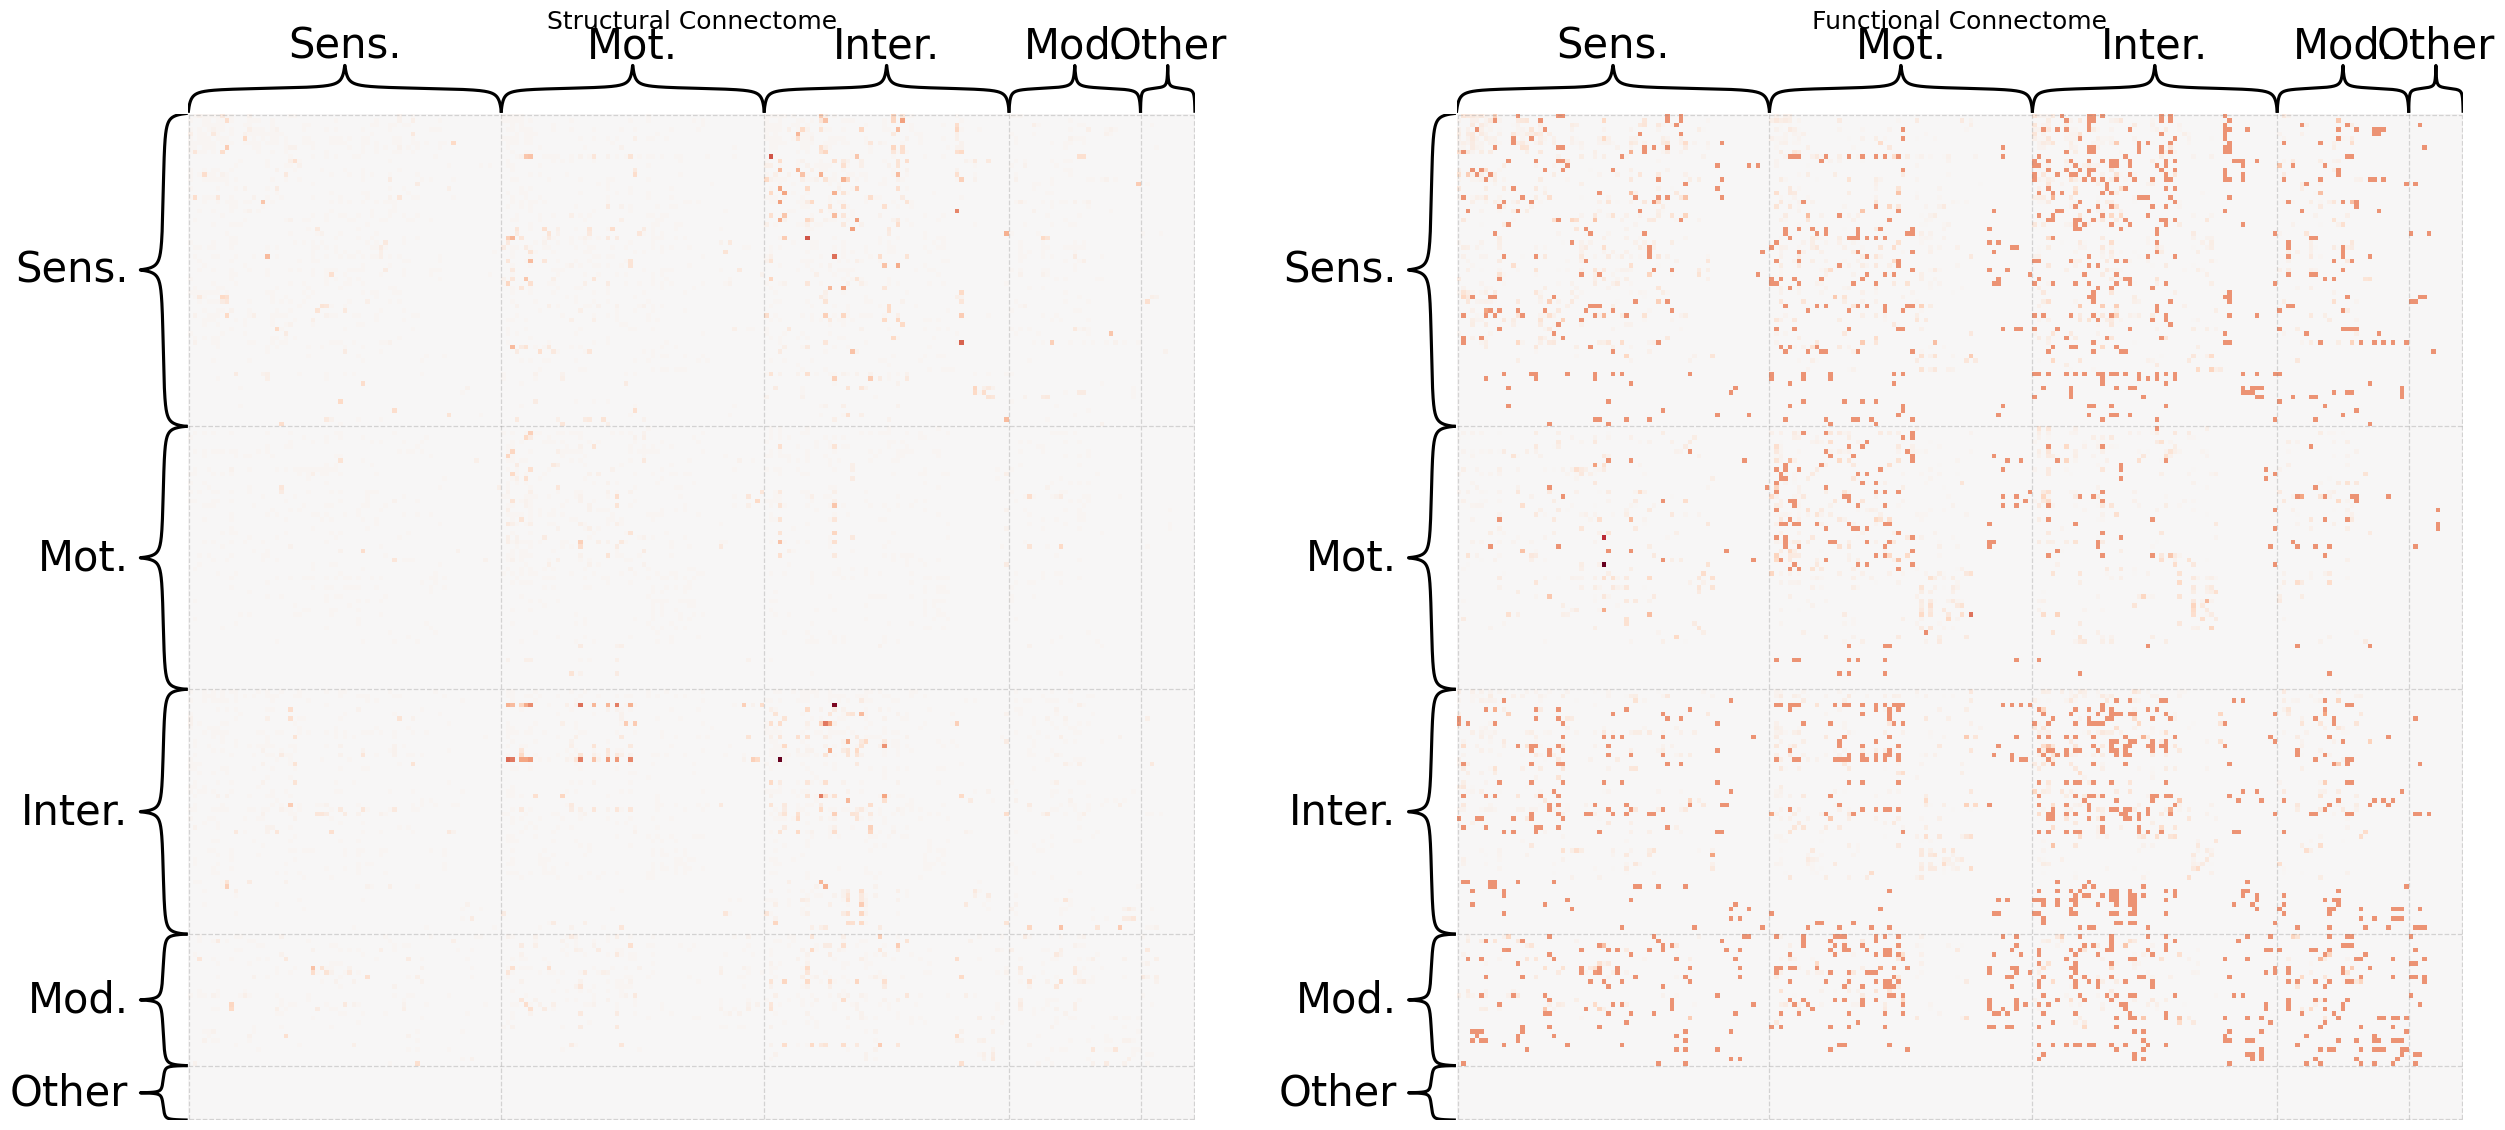

In [49]:
import numpy as np
stx_adj = np.asarray(stx_adj_matrix)
fx_adj = np.asarray(fx_adj_matrix)

title = "Side-by-side Connectomes for Structural and Functional Neuron Data"
fig, axes = plt.subplots(1, 2, figsize=(30, 14))

# Plot structural adjacency matrix
gl.plot.heatmap(stx_adj, inner_hier_labels=neuron_types, sort_nodes=False, title="Structural Connectome", ax=axes[0], cbar=False)

# Plot functional adjacency matrix
gl.plot.heatmap(fx_adj, inner_hier_labels=neuron_types, sort_nodes=False, title="Functional Connectome", ax=axes[1], cbar=False)
plt.show()
